## 1. Scala's real-world project repository data
<p>With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.</p>
<p>Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available. </p>
<p>We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.</p>
<p>The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:</p>
<ol>
<li><code>pulls_2011-2013.csv</code> contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.</li>
<li><code>pulls_2014-2018.csv</code> contains identical information, and spans from 2014 up to 2018.</li>
<li><code>pull_files.csv</code> contains the files that were modified by each pull request.</li>
</ol>

Import the dataset into the notebook. All the relevant files can be found in the datasets subfolder.

1. Import the `pandas` module.
2. Load in `'datasets/pulls_2011-2013.csv'` and `'datasets/pulls_2014-2018.csv'` as pandas DataFrames and assign them to `pulls_one` and `pulls_two` respectively.
3. Similarly, load in `'datasets/pull_files.csv'` and assign it to `pull_files`.

In [3]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls_one = pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('datasets/pull_files.csv')

In [4]:
display(pulls_one.head())
display(pulls_two.head())
display(pull_files.head())

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [5]:
display(pulls_one.info())
display(pulls_two.info())
display(pull_files.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     3296 non-null   int64 
 1   user    3296 non-null   object
 2   date    3296 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     2904 non-null   int64 
 1   user    2904 non-null   object
 2   date    2904 non-null   object
dtypes: int64(1), object(2)
memory usage: 68.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85588 entries, 0 to 85587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     85588 non-null  int64 
 1   file    85588 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


None

## 2. Preparing and cleaning the data
<p>First, we will need to combine the data from the two separate pull DataFrames. </p>
<p>Next, the raw data extracted from GitHub contains dates in the ISO8601 format. However, <code>pandas</code> imports them as regular strings. To make our analysis easier, we need to convert the strings into Python's <code>DateTime</code> objects. <code>DateTime</code> objects have the important property that they can be compared and sorted.</p>
<p>The pull request times are all in UTC (also known as Coordinated Universal Time). The commit times, however, are in the local time of the author with time zone information (number of hours difference from UTC). To make comparisons easy, we should convert all times to UTC.</p>

Combine the two pulls DataFrames and then convert `date` to a `DateTime` object.

1. Append `pulls_one` to `pulls_two` and assign the result to `pulls`.
2. Convert the `date` column for the `pulls` object from a string into a `DateTime` object.

For the conversion, it is recommended using pandas' `to_datetime()` function. Set the `utc` parameter to `True`, as this will simplify future operations.

Coordinated Universal Time (UTC) is the basis for civil time today. This 24-hour time standard is kept using highly precise atomic clocks combined with the Earth's rotation.

In [18]:
# Append pulls_one to pulls_two
# ignore_index ensures that the existing index labels are not used, and the resulting axis will be labeled 0, 1, ..., n-1.
pulls = pulls_one.append(pulls_two, ignore_index=True)
display(pulls.head(), pulls.info())

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)
display(pulls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     6200 non-null   int64 
 1   user    6200 non-null   object
 2   date    6200 non-null   object
dtypes: int64(1), object(2)
memory usage: 145.4+ KB


,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


None

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00


## 3. Merging the DataFrames
<p>The data extracted comes in two separate files. Merging the two DataFrames will make it easier for us to analyze the data in the future tasks.</p>

Merge the two DataFrames:
* Merge `pulls` and `pull_files` on the `pid` column. Assign the result to the data variable.

The `pandas` DataFrame has a `merge` method that will perform the joining of two DataFrames on a common field.

In [7]:
# Merge the two DataFrames
data = pulls.merge(pull_files, on='pid')
display(data.head())

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


## 4. Is the project still actively maintained?
<p>The activity in an open source project is not very consistent. Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. Before committing to contributing to a project, it is important to understand the state of the project. Is development going steadily, or is there a drop? Has the project been abandoned altogether?</p>
<p>The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.</p>
<p>For Scala, we will do this by plotting a chart of the project's activity. We will calculate the number of pull requests submitted each (calendar) month during the project's lifetime. We will then plot these numbers to see the trend of contributions.</p>
<ul>

Calculate and plot project activity in terms of pull requests.

- Group `data` by month and year (i.e. '2011-01', '2011-02', etc), and count the number pull requests (`pid`). Store the counts in a variable called `counts`.
    1. There are a number of ways to accomplish this.
    2. One way would be to create two new columns containing the year and month attributes of the `date` column, and then group by these two variables.
- Plot `counts` using a bar chart (this has been done for you).

,pid,user,date,file,month,year
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala,12,2013
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala,12,2013
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check,12,2013
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...,12,2013
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....,12,2013


month  year
1      2012     489
       2013    3717
       2014    1140
       2015     732
       2016     640
               ... 
12     2013    1692
       2014    1001
       2015     616
       2016     468
       2017     224
Name: pid, Length: 74, dtype: int64


<AxesSubplot: xlabel='month,year'>

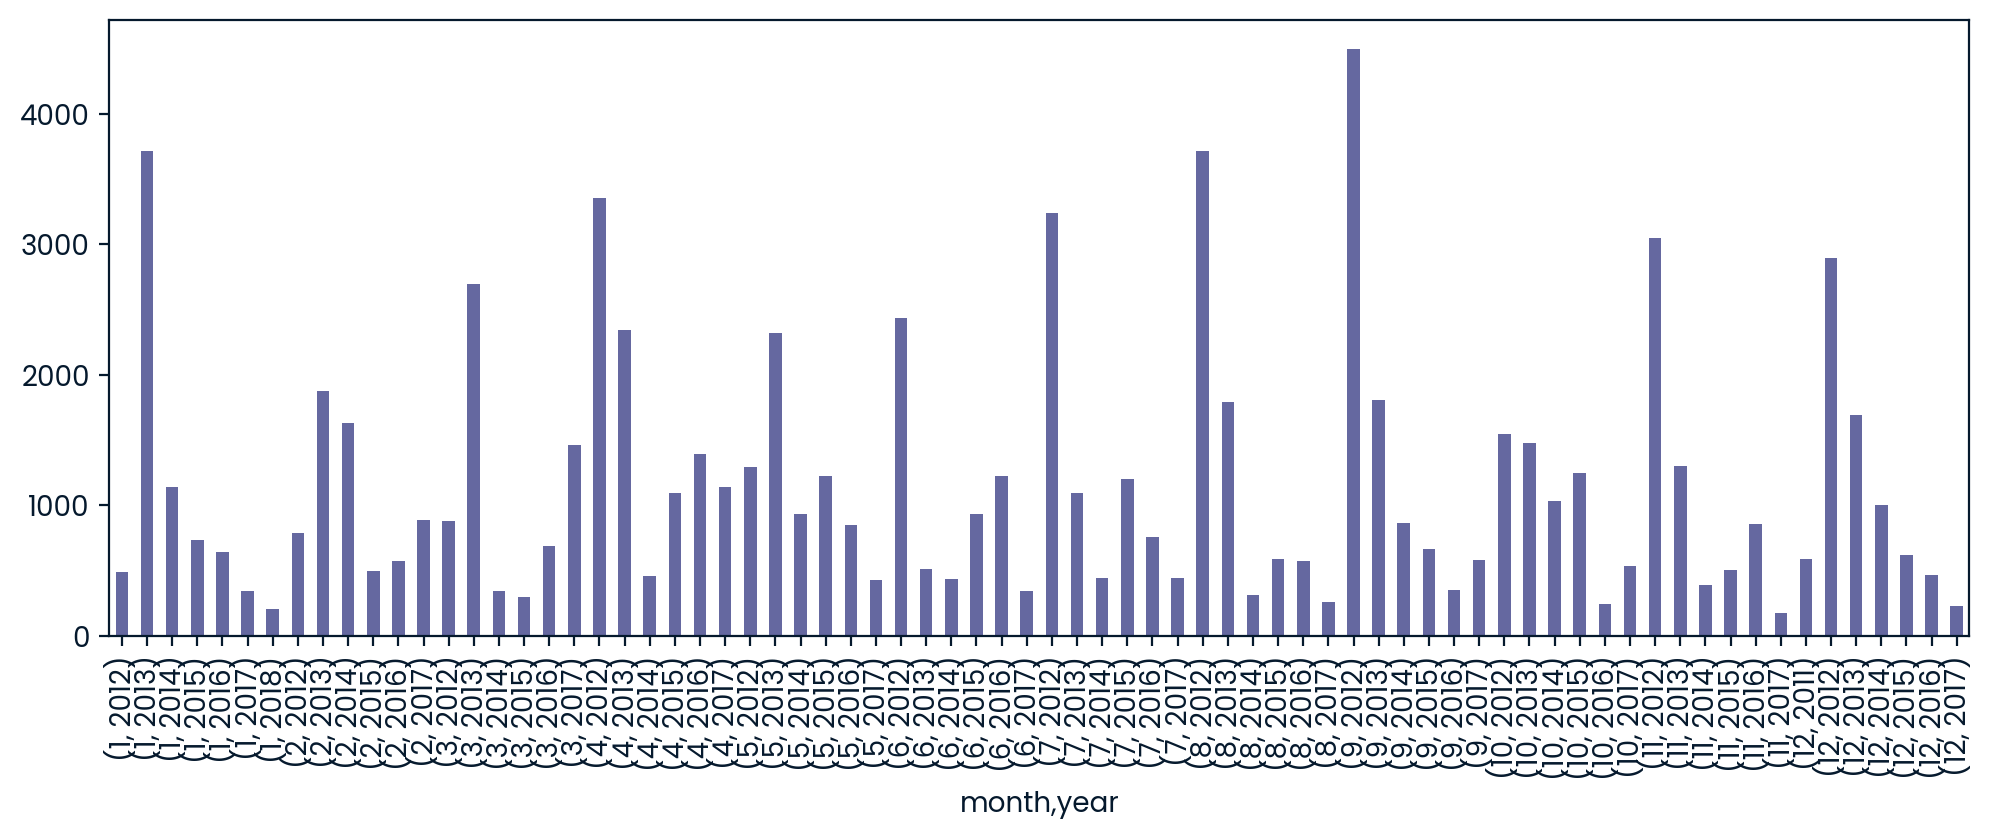

In [39]:
%matplotlib inline

# Create a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year
display(data.head())

# Group by the month and year and count the pull requests
counts = data.groupby(['month', 'year'])['pid'].count()
print(counts)

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

## 5. Is there camaraderie in the project?
<p>The organizational structure varies from one project to another, and it can influence your success as a contributor. A project that has a very small community might not be the best one to start working on. The small community might indicate a high barrier of entry. This can be caused by several factors, including a community that is reluctant to accept pull requests from "outsiders," that the code base is hard to work with, etc. However, a large community can serve as an indicator that the project is regularly accepting pull requests from new contributors. Such a project would be a good place to start.</p>
<p>In order to evaluate the dynamics of the community, we will plot a histogram of the number of pull requests submitted by each user. A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors. </p>

Plot pull requests by user.

- Group the pull requests by each user and count the number of pull requests they submitted. Store the counts in a variable called `by_user`.
- Plot the histogram for `by_user`.

user
0xmohit           2
193s              4
2m               20
4.00E+06         22
AlexeyIvanov8     2
                 ..
yinxusen          1
yllan             4
ziggystar        22
zsxwing           6
zuvizudar         1
Name: pid, Length: 464, dtype: int64


<AxesSubplot: ylabel='Frequency'>

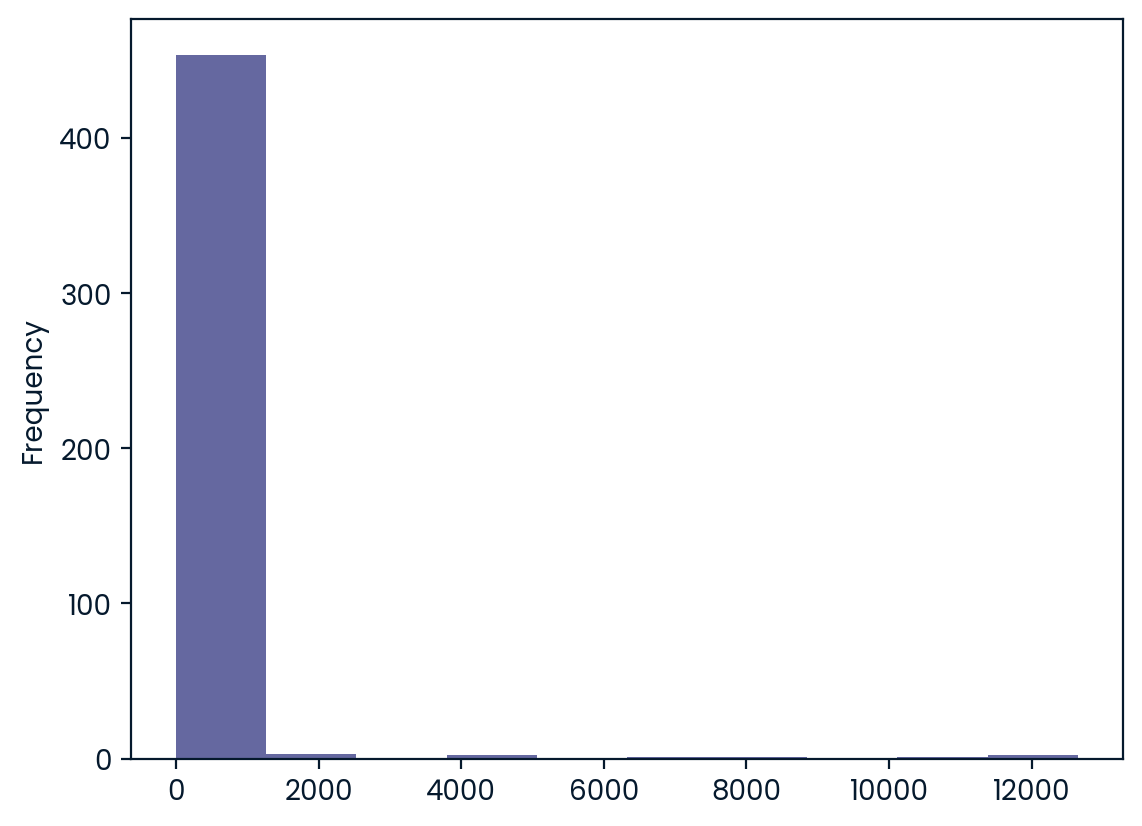

In [34]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby('user')['pid'].count()
print(by_user)

# Plot the histogram
by_user.plot(kind='hist')

                pid
user               
xeno-by       12649
retronym      11430
paulp         11260
adriaanm       7722
lrytz          6988
som-snytt      4660
soc            4350
SethTisue      2256
densh          1448
gkossakowski   1280


<AxesSubplot: ylabel='Frequency'>

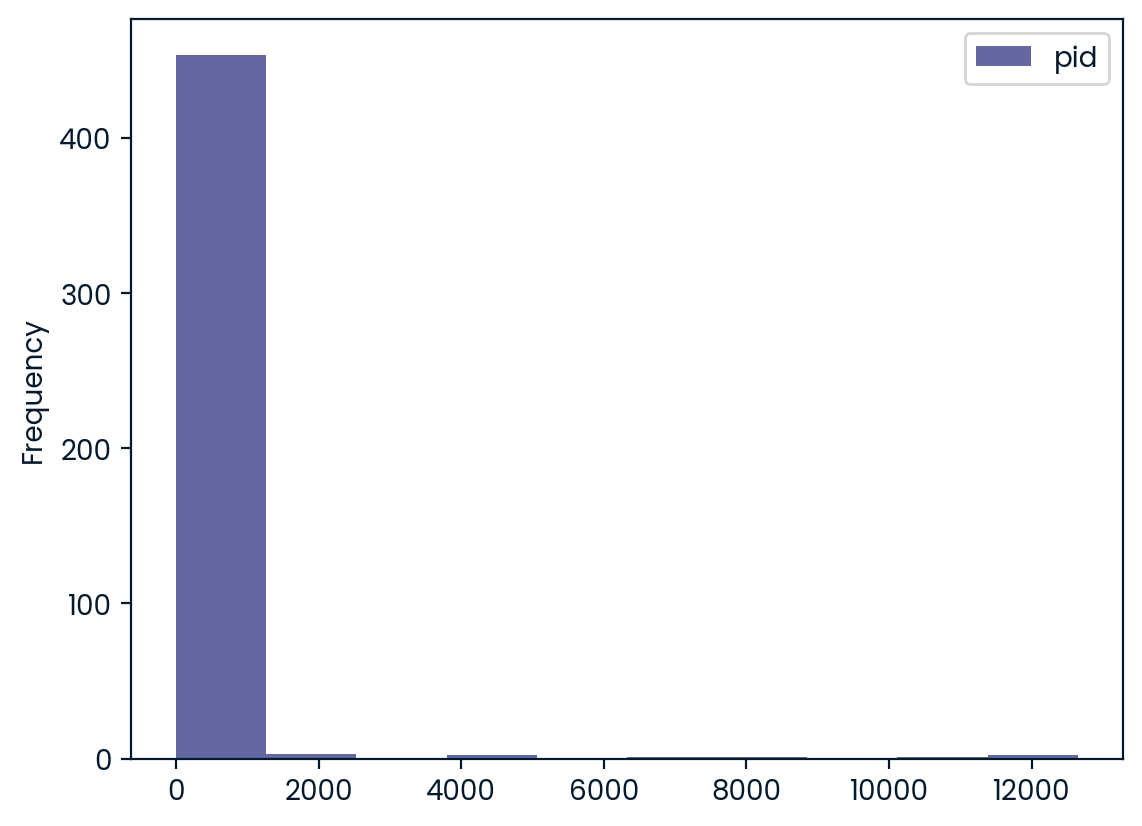

In [40]:
# The agg function allows you to specify an aggregating function after you perform a groupby.
by_user_2 = data.groupby('user').agg({'pid': 'count'})
print(by_user_2.sort_values(by='pid', ascending=False).head(10))

# Plot the histogram
by_user_2.plot(kind='hist')

           user    pid
0       xeno-by  12649
1      retronym  11430
2         paulp  11260
3      adriaanm   7722
4         lrytz   6988
5     som-snytt   4660
6           soc   4350
7     SethTisue   2256
8         densh   1448
9  gkossakowski   1280


<AxesSubplot: ylabel='Frequency'>

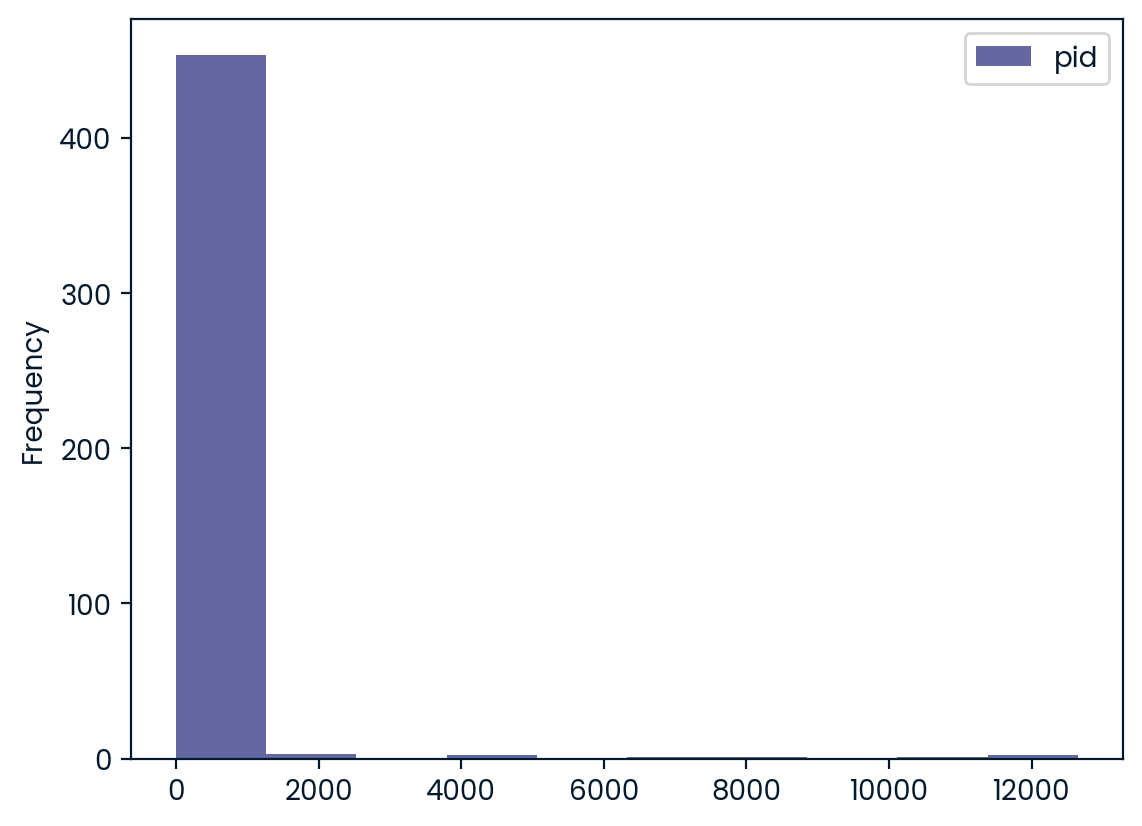

In [41]:
# The agg function allows you to specify an aggregating function after you perform a groupby.
by_user_3 = data.groupby('user').agg({'pid': 'count'})
print(by_user_3.sort_values(by='pid', ascending=False).head(10).reset_index())

# Plot the histogram
by_user_2.plot(kind='hist')

## 6. What files were changed in the last ten pull requests?
<p>Choosing the right place to make a contribution is as important as choosing the project to contribute to. Some parts of the code might be stable, some might be dead. Contributing there might not have the most impact. Therefore it is important to understand the parts of the system that have been recently changed. This allows us to pinpoint the "hot" areas of the code where most of the activity is happening. Focusing on those parts might not the most effective use of our times.</p>

Identify the files changed in the last ten pull requests.

* Select the last ten pull requests and name the resulting DataFrame `last_10`.
* Merge `last_10` with the `pull_files` DataFrame on `pid`, assigning the result to `joined_pr`.
* Identify the unique files in joined_pr (via the file column) using set().

Python's `DateTime` objects are comparable and sortable. A more recent date is larger than an older date. In task 2, we converted the `date` column into `DateTime` objects. Therefore, the largest ten values in the `date` column are the most recent ones.

In [38]:
largest_10 = pulls.nlargest(10, 'date')
largest_10

,pid,user,date
3296,163314316,hrhino,2018-01-16 23:29:16+00:00
3297,163061502,joroKr21,2018-01-15 23:44:52+00:00
3298,163057333,mkeskells,2018-01-15 23:05:06+00:00
3299,162985594,lrytz,2018-01-15 15:52:39+00:00
3300,162838837,zuvizudar,2018-01-14 19:16:16+00:00
3301,162765232,howtonotwin,2018-01-13 04:37:17+00:00
3302,162643301,hrhino,2018-01-12 14:29:49+00:00
3303,162256029,mkeskells,2018-01-10 23:20:03+00:00
3304,162197834,SethTisue,2018-01-10 18:31:25+00:00
3305,162011899,joroKr21,2018-01-10 00:45:57+00:00


In [11]:
# Identify the last 10 pull requests
last_10 = pulls.sort_values(by = 'date').tail(10)
display(last_10)

# Join the two data sets
joined_pr = pull_files.merge(last_10, on='pid')
display(joined_pr.head())

# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files

,pid,user,date
3305,162011899,joroKr21,2018-01-10 00:45:57+00:00
3304,162197834,SethTisue,2018-01-10 18:31:25+00:00
3303,162256029,mkeskells,2018-01-10 23:20:03+00:00
3302,162643301,hrhino,2018-01-12 14:29:49+00:00
3301,162765232,howtonotwin,2018-01-13 04:37:17+00:00
3300,162838837,zuvizudar,2018-01-14 19:16:16+00:00
3299,162985594,lrytz,2018-01-15 15:52:39+00:00
3298,163057333,mkeskells,2018-01-15 23:05:06+00:00
3297,163061502,joroKr21,2018-01-15 23:44:52+00:00
3296,163314316,hrhino,2018-01-16 23:29:16+00:00


,pid,file,user,date
0,163314316,test/files/pos/t5638/Among.java,hrhino,2018-01-16 23:29:16+00:00
1,163314316,test/files/pos/t5638/Usage.scala,hrhino,2018-01-16 23:29:16+00:00
2,163314316,test/files/pos/t9291.scala,hrhino,2018-01-16 23:29:16+00:00
3,163314316,test/files/run/t8348.check,hrhino,2018-01-16 23:29:16+00:00
4,163314316,test/files/run/t8348/TableColumn.java,hrhino,2018-01-16 23:29:16+00:00


{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## 7. Who made the most pull requests to a given file?
<p>When contributing to a project, we might need some guidance. We might find ourselves needing some information regarding the codebase. It is important direct any questions to the right person. Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. One way to identify the right target for our inquiries is by using their contribution history.</p>
<p>We identified <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code> as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.</p>

Identify the top 3 developers that submitted pull requests to `src/compiler/scala/reflect/reify/phases/Calculate.scala`.

* Select the pull requests that changed that file and name the resulting DataFrame `file_pr`.
* Count the number of changes made by each developer and name the resulting DataFrame `author_counts`.
* Print the top 3 developers.

In [12]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file'] == file]
display(file_pr)

# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').count()
display(author_counts)

# Print the top 3 developers
author_counts.nlargest(3, 'file')

,pid,user,date,file,month,year
1234,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
12823,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13381,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13779,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
14970,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,3,2013
17127,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
18341,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
19174,3918789,gkossakowski,2013-01-31 00:43:19+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2013
19834,3854688,melloc,2013-01-26 22:47:32+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2013


,pid,date,file,month,year
user,,,,,
bjornregnell,1,1,1,1,1
densh,1,1,1,1,1
gkossakowski,1,1,1,1,1
melloc,1,1,1,1,1
odersky,2,2,2,2,2
paulp,2,2,2,2,2
retronym,5,5,5,5,5
soc,4,4,4,4,4
starblood,1,1,1,1,1


,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


## 8. Who made the last ten pull requests on a given file?
<p>Open source projects suffer from fluctuating membership. This makes the problem of finding the right person more challenging: the person has to be knowledgeable <em>and</em> still be involved in the project. A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system. </p>
<p>Like in the previous task, we will look at the history of  <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code>.</p>

Identify the most recent ten pull requests that touched `src/compiler/scala/reflect/reify/phases/Calculate.scala`.

* Select the pull requests that touched the file and name the resulting DataFrame `file_pr`.
* Merge `file_pr` with the `pulls` DataFrame on the `pid` column and name the resulting DataFrame `joined_pr`.
* Using `set()`, create a set of users for the ten most recent pull requests.

To find the ten most recent pull requests, use the `nlargest` function of a `DataFrame`. 

In [23]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]
display(file_pr)

# Merge the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')
display(joined_pr)

# Find the users of the last 10 most recent pull requests
# To find the ten most recent pull requests, use the nlargest function of a DataFrame
# To create a set of values of a column named 'user' in a DataFrame named 'joined_pr' (where the 10 most recent dates are selected)
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

# Printing the results
users_last_10

,pid,file
13,162838837,src/compiler/scala/reflect/reify/phases/Calcul...
26951,22845163,src/compiler/scala/reflect/reify/phases/Calcul...
32753,12102550,src/compiler/scala/reflect/reify/phases/Calcul...
35420,10587633,src/compiler/scala/reflect/reify/phases/Calcul...
46700,5320191,src/compiler/scala/reflect/reify/phases/Calcul...
47009,5291974,src/compiler/scala/reflect/reify/phases/Calcul...
47567,5050360,src/compiler/scala/reflect/reify/phases/Calcul...
47965,5026775,src/compiler/scala/reflect/reify/phases/Calcul...
49156,4786005,src/compiler/scala/reflect/reify/phases/Calcul...
51313,4295399,src/compiler/scala/reflect/reify/phases/Calcul...


,pid,user,date,file
0,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
1,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
2,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
3,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
4,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
5,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
6,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
7,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
8,3918789,gkossakowski,2013-01-31 00:43:19+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
9,3854688,melloc,2013-01-26 22:47:32+00:00,src/compiler/scala/reflect/reify/phases/Calcul...


{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## 9. The pull requests of two special developers
<p>Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.</p>

Plot the number of pull requests for two developers, over time.

* Using the `pulls` DataFrame, select all of the pull requests by these two developers and name the resulting DataFrame `by_author`.
* Fill in the `groupby` parameters to count the number of pull requests submitted by each author each year. That is, group by `user` and the year property of `date`.
* Plot `counts_wide` using a bar chart.

`DateTime` objects expose the components of a date through their dt accessors.

`counts` is transformed to a wide format to make plotting the bar chart of pull request count (y-axis) by year (x-axis) by user (legend) easier.

,pid,user,date
7,11126653,xeno-by,2013-12-28 19:39:23+00:00
9,11121557,xeno-by,2013-12-27 23:50:56+00:00
10,11121465,xeno-by,2013-12-27 23:41:05+00:00
11,11121327,xeno-by,2013-12-27 23:25:52+00:00
12,11114584,xeno-by,2013-12-27 15:51:50+00:00


,user,date,pid
0,soc,2011,12
1,soc,2012,44
2,soc,2013,117
3,soc,2014,20
4,soc,2015,24
5,soc,2016,21
6,xeno-by,2011,20
7,xeno-by,2012,271
8,xeno-by,2013,123
9,xeno-by,2014,60


user,soc,xeno-by
date,,
2011,12,20
2012,44,271
2013,117,123
2014,20,60
2015,24,3
2016,21,0


<AxesSubplot: xlabel='date'>

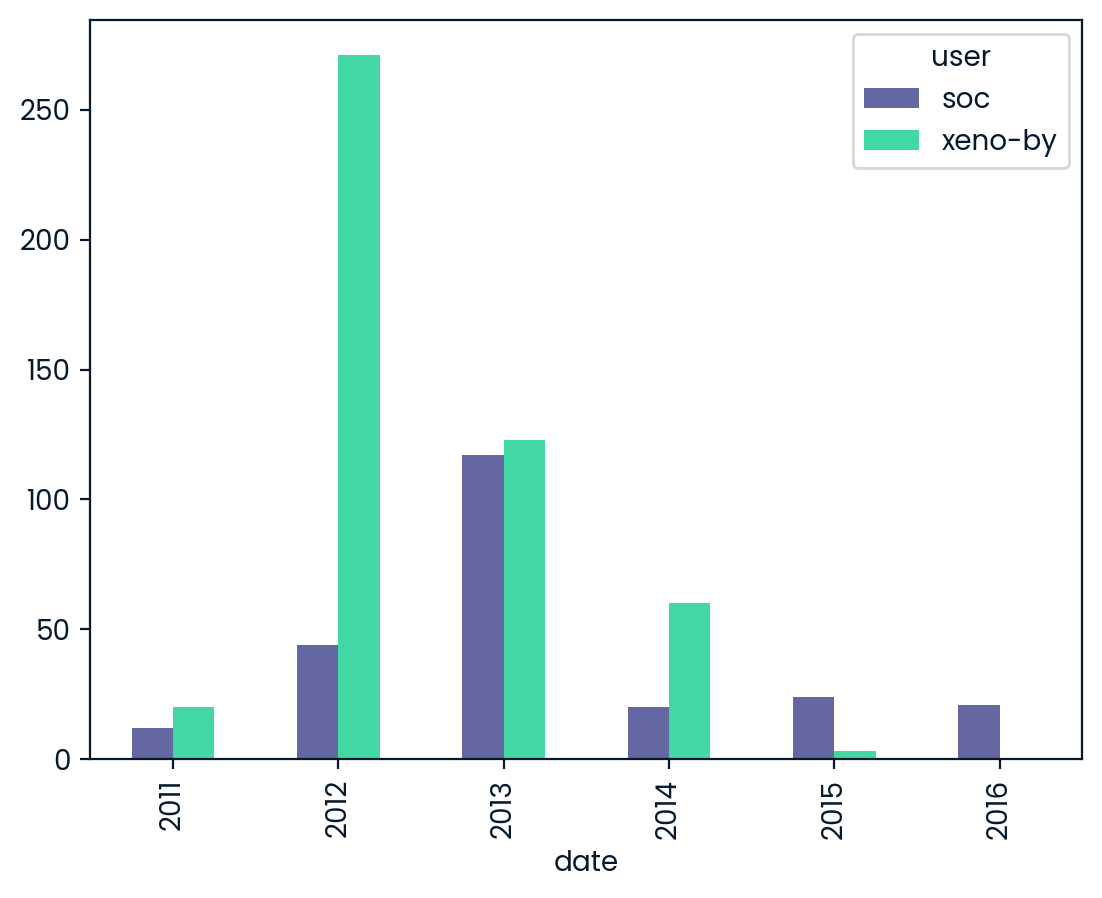

In [24]:
%matplotlib inline

# To filter a DataFrame to include items that are in a list named column_list, you can use isin
# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]
display(by_author.head())

# Count the number of pull requests submitted each year
# A DateTime object has a dt accessor that can be used to access properties.
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()
display(counts)

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
display(counts_wide)

# Plotting counts_wide would look like so (where the kind parameter needs to be filled in)
# Plot the results
counts_wide.plot(kind='bar')

In [28]:
# the total number of pull requests submitted by each developer
total_counts = by_author.groupby('user').agg({'pid': 'count'}).reset_index()
total_counts

,user,pid
0,soc,238
1,xeno-by,477


## 10. Visualizing the contributions of each developer
<p>As mentioned before, it is important to make a distinction between the global expertise and contribution levels and the contribution levels at a more granular level (file, submodule, etc.) In our case, we want to see which of our two developers of interest have the most experience with the code in a given file. We will measure experience by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.</p>

Calculate the number of pull requests submitted by a developer to a file each year.

* Select the pull requests submitted by the authors from the `data` DataFrame and name the results `by_author`.
* Select the pull requests from `by_author` that affect the file and name the results `by_file`.
* Transform `grouped` into a wide format using `pivot_table`. Name the results `by_file_wide`.

The code required to complete bullet one in this task is the same as the code for bullet one in task 9, except on the `data` DataFrame instead of the `pulls` DataFrame.

`by_file` is transformed to a wide format to make plotting the bar chart of pull request count (y-axis) by year (x-axis) by user (legend) easier. The columns for `by_file_wide` are as follows:

* Index column: `date`
* Columns to expand: `user`
* Value columns: `pid`
* Fill value: 0

fill_value: None or float value, default None (NaN) Fill existing missing (NaN) values, and any new element needed for successful Series alignment, with this value before computation. If data in both corresponding Series locations is missing the result will be missing.

,pid,user,date,file,month,year
25,11126653,xeno-by,2013-12-28 19:39:23+00:00,src/reflect/scala/reflect/internal/Mirrors.scala,12,2013
26,11126653,xeno-by,2013-12-28 19:39:23+00:00,test/junit/scala/reflect/internal/MirrorsTest....,12,2013
31,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a.check,12,2013
32,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Macros_1.scala,12,2013
33,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Test_2.scala,12,2013
34,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104b.check,12,2013
35,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104b/Macros_1.scala,12,2013
36,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104b/Test_2.scala,12,2013
37,11121465,xeno-by,2013-12-27 23:41:05+00:00,test/files/neg/t8104.check,12,2013
38,11121465,xeno-by,2013-12-27 23:41:05+00:00,test/files/neg/t8104/Macros_1.scala,12,2013


,pid,user,date,file,month,year
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
18341,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
28951,2721711,soc,2012-10-21 19:58:20+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,10,2012
35498,2072662,xeno-by,2012-08-16 05:39:22+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,8,2012
35608,2071228,xeno-by,2012-08-15 23:41:59+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,8,2012
36860,1984445,soc,2012-08-06 18:38:28+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,8,2012
42404,1522783,xeno-by,2012-06-08 13:43:35+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,6,2012
42712,1522613,xeno-by,2012-06-08 13:22:10+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,6,2012
43102,1482038,xeno-by,2012-06-03 18:01:36+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,6,2012
43435,1482035,xeno-by,2012-06-03 18:00:39+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,6,2012


,user,date,pid
0,soc,2012,2
1,soc,2013,2
2,xeno-by,2012,10
3,xeno-by,2014,1


user,soc,xeno-by
date,,
2012,2,10
2013,2,0
2014,0,1


<AxesSubplot: xlabel='date'>

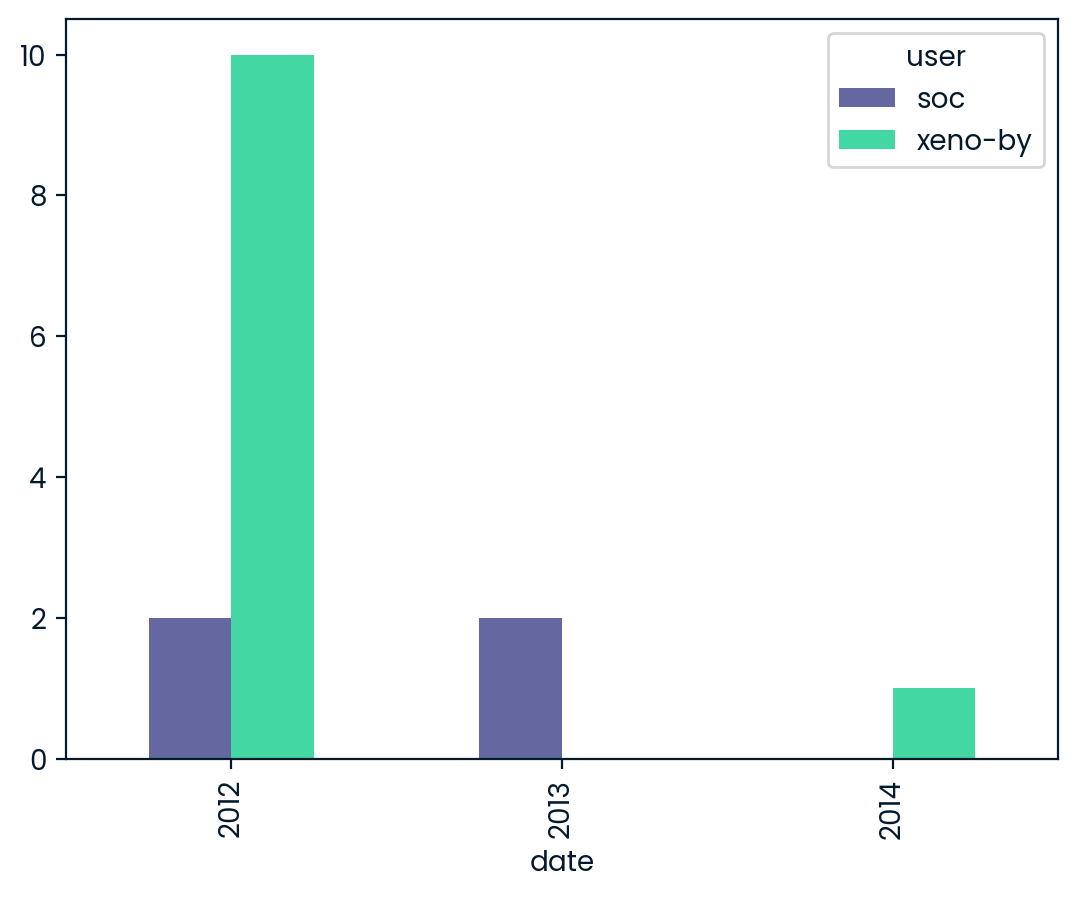

In [29]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]
display(by_author.head(n=10))

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]
display(by_file)

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()
display(grouped)

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)
display(by_file_wide)

# Plot the results
by_file_wide.plot(kind='bar')

In [16]:
# we want to see which of our two developers of interest have the most experience with the code in a given file.
more_popular = 'xeno-by'

print(f'the more popular of the two developers that have the most experience is {more_popular}')

the more popular of the two developers that have the most experience is xeno-by
